In [2]:
import nltk
import numpy as np
from tqdm.notebook import tqdm_notebook 
import tqdm
import pandas as pd
import os
import math
import warnings
warnings.filterwarnings('ignore')
import argparse
import timeit

from ir_system import IRSystem

In [3]:
df_freqs_poids = pd.read_csv('freq_poids_porter.csv')
df_freqs_poids

,Document,Terme,Frequence,Poid
0,1,18,1,0.565909
1,1,edit,4,1.543491
2,1,dewey,3,1.566545
3,1,decim,2,0.982483
4,1,classif,2,0.586663
...,...,...,...,...
77166,1460,100,1,0.630405
77167,1460,150,1,0.896041
77168,1460,thousand,1,0.674123
77169,1460,new,1,0.283413


In [4]:
df_freqs_poids['Terme'].unique().shape
unique_terms = list(df_freqs_poids['Terme'].unique())
len(unique_terms)

6924

In [5]:
df_freqs_poids.loc[df_freqs_poids['Document'] == 1]
df = pd.DataFrame(columns = unique_terms)
df

,18,edit,dewey,decim,classif,present,studi,histori,first,ddc,...,anglo,monopoli,patente,sell,inventor,claus,morn,supposit,15%,9%


In [6]:
for document in df_freqs_poids['Document'].unique():
    temp = df_freqs_poids.loc[df_freqs_poids['Document'] == document]
    temp = temp.drop(['Frequence'], axis=1)
    df.loc[document] = pd.Series((pd.Series(temp.Poid.values,index=temp.Terme.values).to_dict()))

In [7]:
df.fillna(0, inplace=True)
df

,18,edit,dewey,decim,classif,present,studi,histori,first,ddc,...,anglo,monopoli,patente,sell,inventor,claus,morn,supposit,15%,9%
1,0.565909,1.543491,1.566545,0.982483,0.586663,0.187722,0.175460,0.735847,0.488596,1.233434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162865,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140368,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1457,0.000000,0.000000,0.000000,0.000000,0.000000,0.125148,0.000000,0.000000,0.000000,0.000000,...,0.527442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.054883,1.054883,1.054883,1.054883,1.054883,1.054883,1.054883,0.000000,0.000000
1459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df.to_csv('df_poids.csv')

## DBscan

In [9]:
from sklearn.cluster import DBSCAN


In [26]:
df = pd.read_csv('distances.csv')

In [27]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
0,0.805025,0.000000,0.018662,0.027070,0.006798,0.042279,0.047851,0.030255,0.039387,0.028121,...,0.000000,0.007073,0.025160,0.049339,0.056414,0.042538,0.105889,0.000000,0.000000,0.042435
1,0.000000,0.800389,0.027466,0.101121,0.039517,0.038428,0.015176,0.035955,0.053661,0.091310,...,0.031169,0.024241,0.079333,0.024746,0.031087,0.063846,0.093681,0.050315,0.014225,0.088477
2,0.024980,0.050385,0.730271,0.019091,0.010475,0.045179,0.000000,0.042415,0.007904,0.008359,...,0.065433,0.027154,0.009467,0.016103,0.030037,0.009649,0.021973,0.013442,0.000000,0.012174
3,0.019599,0.111904,0.016999,0.869663,0.063982,0.054845,0.046510,0.061062,0.069227,0.059354,...,0.010085,0.017054,0.043987,0.097326,0.127913,0.047186,0.097815,0.012416,0.039501,0.036381
4,0.013963,0.079404,0.008036,0.103811,0.704310,0.076826,0.013574,0.040153,0.043257,0.036166,...,0.013369,0.046021,0.122123,0.061783,0.071693,0.069683,0.158987,0.017924,0.015595,0.081016


In [382]:
model = DBSCAN(eps=1.4688888, min_samples=3).fit(df)
labels = np.array(list(model.labels_))
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [383]:
labels[labels == -1].shape

(634,)

In [384]:
labels[labels == 0].shape

(779,)

In [385]:
labels[labels == 4].shape

(4,)

### PCA

In [14]:
from sklearn.decomposition import PCA

In [386]:
pca = PCA(n_components=2)
pca.fit(df)
x_pca = pca.transform(df)
pca_df = pd.DataFrame(x_pca)
pca_df

,0,1
0,-0.455808,-0.260237
1,-0.096009,0.312911
2,-0.471861,-0.479942
3,0.089003,0.702187
4,-0.207169,0.433316
...,...,...
1455,-0.321140,0.044821
1456,-0.369436,0.501869
1457,-0.677266,-0.391098
1458,-0.372970,-0.498213


In [387]:
## try to normalize the data
from sklearn import preprocessing

x = pca_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
pca_df_normalized = pd.DataFrame(x_scaled)

In [388]:
pca_df_normalized

,0,1
0,0.278896,0.347383
1,0.425996,0.616250
2,0.272333,0.244317
3,0.501636,0.798862
4,0.380549,0.672733
...,...,...
1455,0.333954,0.490487
1456,0.314208,0.704892
1457,0.188355,0.285995
1458,0.312763,0.235746


In [535]:
model = DBSCAN(eps=0.02222221, min_samples=7).fit(pca_df_normalized)
labels = np.array(list(model.labels_))
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [536]:
labels[labels == -1].shape

(451,)

In [537]:
labels[labels == 0].shape

(63,)

In [538]:
labels[labels == 1].shape

(354,)

In [539]:
labels[labels == 2].shape

(152,)

In [540]:
import matplotlib.pyplot as plt

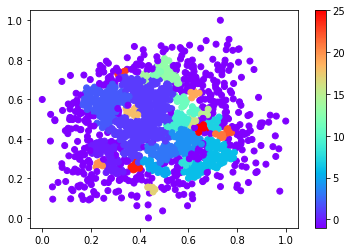

In [541]:
plt.scatter(pca_df_normalized[0],pca_df_normalized[1], c=labels, cmap='rainbow')
plt.colorbar()